In [1]:
# Modify the file 00_setup.py to define input/output file paths on your system
# The information in 00_setup.py will be used across notebooks
from importlib.machinery import SourceFileLoader
setup = SourceFileLoader("setup", "./00_setup.py").load_module()

# DGI vs NAICS Group Explorations
In hierarchical encoding, more general NAICS categories are worse than specific.  For DGI clusters, it's the opposite.  Why? 

See also https://www.peggykern.org/uploads/5/6/6/7/56678211/ftestformulas.pdf

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import importlib, os

In [3]:
import seaborn as sns

In [4]:
from sba_gnn.sba_gnn import sg_plot 
sg_plot.plot_defaults()

In [5]:
import matplotlib.pyplot as plt

## Import Data

In [6]:
sba_loans = pd.read_parquet(Path(setup.temp_path).joinpath('01_DATA_transformed.parquet'))

In [7]:
sba_loans.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'target', 'guaranteed_fract', 'new_business', 'urban_flag',
       'franchise_flag', 'NAICS_2', 'NAICS_sector', 'NAICS_sector_desc',
       'NAICS_num', 'dset', 'dset_naics_holdout', 'NAICS_5', 'NAICS_4',
       'NAICS_3', 'menc_NAICS', 'menc_NAICS_5', 'menc_NAICS_4', 'menc_NAICS_3',
       'menc_NAICS_sector', 'mhier_NAICS',
       'NS___Accommodation and Food Services',
       'NS___Administrative and Support and Waste Management and Remediation Services',
       'NS___Construction', 'NS___Health Care and Social Assistance',
       'NS___Manufacturing',
       'NS___Other Services (except Public Administra

In [8]:
embed_df = pd.read_parquet(Path(setup.temp_path).joinpath('63_DATA_embeddings_tsne_naics.parquet'))

In [9]:
naics_grp_col = ['NAICS_5', 'NAICS_4', 'NAICS_3', 'NAICS_sector']

In [10]:
naics_dgi_col = [c for c in embed_df.columns if c.startswith('cluster_')]

In [11]:
loans_simplified = sba_loans[['LoanNr_ChkDgt', 'target', 'dset', 'dset_naics_holdout', 'NAICS'] +
                          naics_grp_col] \
    .merge(embed_df[['NAICS_orig'] + naics_dgi_col].rename(columns={'NAICS_orig':'NAICS'}),
           on='NAICS')

In [12]:
loans_simplified.head()

,LoanNr_ChkDgt,target,dset,dset_naics_holdout,NAICS,NAICS_5,NAICS_4,NAICS_3,NAICS_sector,cluster_003,cluster_010,cluster_020,cluster_106,cluster_354,cluster_834
0,1000014003,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
1,1000944000,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
2,1001095003,1,val,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
3,1004545002,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
4,1011395003,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300


In [13]:
train_df = loans_simplified[loans_simplified['dset'] == 'train'].copy()

##### Group stats

In [14]:
naics_grp_stats_train = pd.read_csv(Path(setup.temp_path).joinpath('02_REPORT_naics_grp_stats_train.csv'))
naics_grp_stats = pd.read_csv(Path(setup.temp_path).joinpath('02_REPORT_naics_grp_stats_all.csv'))

## Summarize Levels for NAICS, DGI

##### NAICS standard

In [17]:
importlib.reload(sg_plot)

<module 'sba_gnn.sba_gnn.sg_plot' from '/Users/valeriecarey/Documents/projects/2023_10_blog_gnn_sba/code/sba_gnn/sba_gnn/sg_plot.py'>

In [19]:
dgi_grp_stats = pd.concat([sg_plot.naics_grp_stats(loans_simplified, c) for c in reversed(naics_dgi_col)],
                      keys=reversed(naics_dgi_col))
dgi_grp_stats.to_csv(Path(setup.temp_path).joinpath('82_REPORT_dgi_grp_stats_all.csv'), index=True)
dgi_grp_stats

count_grp           mean         median  \
cluster_834 loan_count        834.0     825.037170     198.500000   
            target            834.0       0.194650       0.181818   
            low_vol           834.0       0.267386       0.000000   
            naics_count       834.0       1.571942       1.000000   
            single_naics      834.0       0.750600       1.000000   
cluster_354 loan_count        354.0    1943.731638     613.000000   
            target            354.0       0.186311       0.180323   
            low_vol           354.0       0.194915       0.000000   
            naics_count       354.0       3.703390       2.000000   
            single_naics      354.0       0.327684       0.000000   
cluster_106 loan_count        106.0    6491.330189    3719.000000   
            target            106.0       0.182002       0.182612   
            low_vol           106.0       0.132075       0.000000   
            naics_count       106.0      12.367925       8.000000   
            single_naics      106.0       0.084906       0.000000   
cluster_020 loan_count         20.0   34404.050000   31364.000000   
            target             20.0       0.178915       0.173361   
            low_vol            20.0       0.000000       0.000000   
            naics_count        20.0      65.550000      52.000000   
            single_naics       20.0       0.000000       0.000000   
cluster_010 loan_count         10.0   68808.100000   57566.500000   
            target             10.0       0.198404       0.206809   
            low_vol            10.0       0.000000       0.000000   
            naics_count        10.0     131.100000     108.000000   
            single_naics       10.0       0.000000       0.000000   
cluster_003 loan_count          3.0  229360.333333  248600.000000   
            target              3.0       0.189308       0.227860   
            low_vol             3.0       0.000000       0.000000   
            naics_count         3.0     437.000000     423.000000   
            single_naics        3.0       0.000000       0.000000   

                                    min            max            sum  
cluster_834 loan_count         1.000000   27945.000000  688081.000000  
            target             0.000000       1.000000     162.337803  
            low_vol            0.000000       1.000000     223.000000  
            naics_count        1.000000      34.000000    1311.000000  
            single_naics       0.000000       1.000000     626.000000  
cluster_354 loan_count         1.000000   30514.000000  688081.000000  
            target             0.000000       1.000000      65.954049  
            low_vol            0.000000       1.000000      69.000000  
            naics_count        1.000000      57.000000    1311.000000  
            single_naics       0.000000       1.000000     116.000000  
cluster_106 loan_count         1.000000   49511.000000  688081.000000  
            target             0.000000       1.000000      19.292227  
            low_vol            0.000000       1.000000      14.000000  
            naics_count        1.000000      84.000000    1311.000000  
            single_naics       0.000000       1.000000       9.000000  
cluster_020 loan_count       123.000000   95480.000000  688081.000000  
            target             0.056911       0.315166       3.578305  
            low_vol            0.000000       0.000000       0.000000  
            naics_count        5.000000     244.000000    1311.000000  
            single_naics       0.000000       0.000000       0.000000  
cluster_010 loan_count     16308.000000  128618.000000  688081.000000  
            target             0.086351       0.308144       1.984039  
            low_vol            0.000000       0.000000       0.000000  
            naics_count       49.000000     305.000000    1311.000000  
            single_naics       0.000000       0.000000       0.000000  
cluster_003 lo

In [20]:
dgi_grp_stats_train = pd.concat([sg_plot.naics_grp_stats(train_df, c) for c in reversed(naics_dgi_col)],
                      keys=reversed(naics_dgi_col))
dgi_grp_stats_train.to_csv(Path(setup.temp_path).joinpath('82_REPORT_dgi_grp_stats_train.csv'), index=True)
dgi_grp_stats_train

count_grp           mean         median  \
cluster_834 loan_count        757.0     576.116248     148.000000   
            target            757.0       0.193115       0.179579   
            low_vol           757.0       0.324967       0.000000   
            naics_count       757.0       1.540291       1.000000   
            single_naics      757.0       0.755614       1.000000   
cluster_354 loan_count        338.0    1290.295858     434.000000   
            target            338.0       0.182930       0.167184   
            low_vol           338.0       0.218935       0.000000   
            naics_count       338.0       3.449704       2.000000   
            single_naics      338.0       0.334320       0.000000   
cluster_106 loan_count        105.0    4153.523810    2188.000000   
            target            105.0       0.182332       0.179888   
            low_vol           105.0       0.123810       0.000000   
            naics_count       105.0      11.104762       8.000000   
            single_naics      105.0       0.095238       0.000000   
cluster_020 loan_count         20.0   21806.000000   19120.000000   
            target             20.0       0.178318       0.172250   
            low_vol            20.0       0.000000       0.000000   
            naics_count        20.0      58.300000      45.500000   
            single_naics       20.0       0.000000       0.000000   
cluster_010 loan_count         10.0   43612.000000   36565.000000   
            target             10.0       0.196811       0.205109   
            low_vol            10.0       0.000000       0.000000   
            naics_count        10.0     116.600000      96.500000   
            single_naics       10.0       0.000000       0.000000   
cluster_003 loan_count          3.0  145373.333333  161808.000000   
            target              3.0       0.189349       0.227072   
            low_vol             3.0       0.000000       0.000000   
            naics_count         3.0     388.666667     375.000000   
            single_naics        3.0       0.000000       0.000000   

                                   min            max            sum  
cluster_834 loan_count        1.000000   19570.000000  436120.000000  
            target            0.000000       1.000000     146.188064  
            low_vol           0.000000       1.000000     246.000000  
            naics_count       1.000000      31.000000    1166.000000  
            single_naics      0.000000       1.000000     572.000000  
cluster_354 loan_count        1.000000   21378.000000  436120.000000  
            target            0.000000       1.000000      61.830376  
            low_vol           0.000000       1.000000      74.000000  
            naics_count       1.000000      54.000000    1166.000000  
            single_naics      0.000000       1.000000     113.000000  
cluster_106 loan_count        1.000000   34096.000000  436120.000000  
            target            0.000000       1.000000      19.144825  
            low_vol           0.000000       1.000000      13.000000  
            naics_count       1.000000      77.000000    1166.000000  
            single_naics      0.000000       1.000000      10.000000  
cluster_020 loan_count       88.000000   63823.000000  436120.000000  
            target            0.068182       0.317824       3.566360  
            low_vol           0.000000       0.000000       0.000000  
            naics_count       3.000000     220.000000    1166.000000  
            single_naics      0.000000       0.000000       0.000000  
cluster_010 loan_count    11315.000000   85191.000000  436120.000000  
            target            0.086471       0.308202       1.968109  
            low_vol           0.000000       0.000000       0.000000  
            naics_count      47.000000     270.000000    1166.000000  
            single_naics      0.000000       0.000000       0.000000  
cluster_003 loan_count    94626.000000  

## Compare Guessing Group Mean vs. Overal Mean
Sum of squares - differences from means

In [59]:
def ss_diff_means(data, group_col):
    N = len(data)
    k = len(data[group_col].drop_duplicates())
    
    grand_mean = data['target'].mean()

    group_means = data.groupby(group_col) \
        ['target'] \
        .agg(['count', 'mean']) \
        .set_axis(['n_group', 'group_mean'], axis=1) \
        .reset_index()
    
    data = data.merge(group_means, on=group_col)
    
    data['ss_grand_mean'] = (data['target'] - grand_mean)**2
    data['ss_grp_mean'] = (data['target'] - data['group_mean'])**2
    
    ss_grand_mean = data['ss_grand_mean'].sum()
    
    ss_grp_mean = data['ss_grp_mean'].sum()

    
    return pd.DataFrame({'N': [N], 'k': [k],
                         'ss_grand_mean': [ss_grand_mean], 
                         'ss_grp_mean':[ss_grp_mean]})
        
    

In [60]:
naics_mean_ss = pd.concat([ss_diff_means(train_df, c) for c in naics_grp_col],
                             keys=naics_grp_col)
naics_mean_ss

,,N,k,ss_grand_mean,ss_grp_mean
NAICS_5,0,436120,770,70987.750995,67119.534913
NAICS_4,0,436120,348,70987.750995,67697.467833
NAICS_3,0,436120,105,70987.750995,68520.985730
NAICS_sector,0,436120,20,70987.750995,70098.882943


In [61]:
dgi_mean_ss = pd.concat([ss_diff_means(train_df, c) for c in naics_dgi_col],
                             keys=naics_dgi_col)
dgi_mean_ss

,,N,k,ss_grand_mean,ss_grp_mean
cluster_003,0,436120,3,70987.750995,69727.314121
cluster_010,0,436120,10,70987.750995,69209.323115
cluster_020,0,436120,20,70987.750995,68774.499350
cluster_106,0,436120,105,70987.750995,68106.698570
cluster_354,0,436120,338,70987.750995,67585.670748
cluster_834,0,436120,757,70987.750995,67095.919079


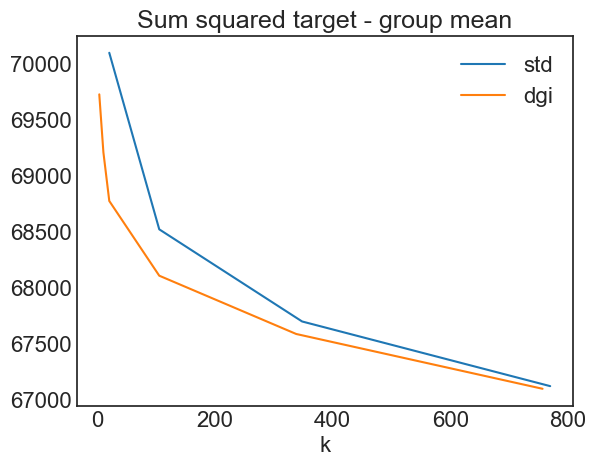

In [64]:
fig, ax = plt.subplots()
naics_mean_ss.plot(x='k', y='ss_grp_mean', label='std', ax=ax)
dgi_mean_ss.plot(x='k', y='ss_grp_mean', label='dgi', ax=ax)
plt.title('Sum squared target - group mean')
plt.show()

It appears the DGI group means are more similar than the overall mean to the target rates - this doesn't explain the results!

## Single-NAICS Groupings 
Which groups are essentially single NAICS?  

In [41]:
def single_code_stats(data, group_col):
    data_naics = data[['NAICS', group_col, 'target']] \
        .drop_duplicates('NAICS') \
        .reset_index()
    
    tot_naics = len(data_naics)
    
    data_naics_grp = data_naics.groupby(group_col) \
        ['target'] \
        .agg('count') \
        .reset_index()
    
    k = len(data_naics_grp)
    
    naics_1 = len(data_naics_grp[data_naics_grp['target'] == 1])
    
    return pd.DataFrame({'k': k,
                         'tot_naics': [tot_naics],
                         'single_naics': [naics_1],
                           'single_rate': [naics_1/tot_naics]})

In [42]:
single_rate_std = pd.concat([single_code_stats(train_df, c) for c in naics_grp_col],
                             keys=naics_grp_col)
single_rate_std

,,k,tot_naics,single_naics,single_rate
NAICS_5,0,770,1166,574,0.492281
NAICS_4,0,348,1166,93,0.079760
NAICS_3,0,105,1166,6,0.005146
NAICS_sector,0,20,1166,0,0.000000


In [43]:
single_rate_dgi = pd.concat([single_code_stats(train_df, c) for c in naics_dgi_col],
                             keys=naics_dgi_col)
single_rate_dgi

,,k,tot_naics,single_naics,single_rate
cluster_003,0,3,1166,0,0.000000
cluster_010,0,10,1166,0,0.000000
cluster_020,0,20,1166,0,0.000000
cluster_106,0,105,1166,10,0.008576
cluster_354,0,338,1166,113,0.096913
cluster_834,0,757,1166,572,0.490566


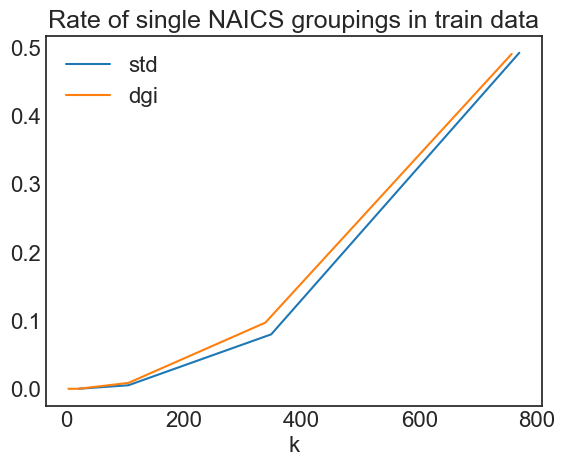

In [65]:
fig, ax = plt.subplots()
single_rate_std.plot(x='k', y='single_rate', label='std', ax=ax)
single_rate_dgi.plot(x='k', y='single_rate', label='dgi', ax=ax)
plt.title('Rate of single NAICS groupings in train data')
plt.show()

The rates are not terribly different.  The higher DGI rate is maybe consistent with the trends but this isn't a big difference

## NAICS 5 / cluster_834 Exploration
Look at the smallest groupings, and how holdouts join to these

## Full ANOVA terms at Loan Level

In [45]:
def get_ss_info(data, group_col):
    N = len(data)
    k = len(data[group_col].drop_duplicates())
    
    grand_mean = data['target'].mean()
    
    group_means = data.groupby(group_col) \
        ['target'] \
        .agg(['count', 'mean']) \
        .set_axis(['n_group', 'group_mean'], axis=1) \
        .reset_index()
    
    #group_means = group_means[group_means['n_group'] > 1]
    
    group_means['ss_between'] = group_means['n_group'] * \
        (group_means['group_mean'] - grand_mean)**2
    
    ss_between = group_means['ss_between'].sum()
    ms_between = ss_between / (k - 1)
    
    base_var = data.merge(group_means, on=group_col) 
    base_var['ss_within'] = (base_var['target'] - base_var['group_mean'])**2
    
    ss_within =  base_var['ss_within'].sum()
    ms_within = ss_within / (N - k)
    
    F = ms_between / ms_within
    
    return pd.DataFrame({'F': [F], 'N': [N], 'k': [k],
                         'ss_between': [ss_between], 'ms_between': [ms_between],
                         'ss_within':[ss_within], 'ms_within':[ms_within],
                         'ss_tot': [ss_within + ss_between]})
    

In [46]:
ss_info_dgi = pd.concat([get_ss_info(train_df, c) for c in naics_dgi_col],
                         keys=naics_dgi_col)
ss_info_dgi

,,F,N,k,ss_between,ms_between,ss_within,ms_within,ss_tot
cluster_003,0,3941.769128,436120,3,1260.436874,630.218437,69727.314121,0.159882,70987.750995
cluster_010,0,1245.160090,436120,10,1778.427880,197.603098,69209.323115,0.158697,70987.750995
cluster_020,0,738.645139,436120,20,2213.251645,116.486929,68774.499350,0.157704,70987.750995
cluster_106,0,177.349277,436120,105,2881.052425,27.702427,68106.698570,0.156203,70987.750995
cluster_354,0,65.092254,436120,338,3402.080247,10.095194,67585.670748,0.155091,70987.750995
cluster_834,0,33.403171,436120,757,3891.831916,5.147926,67095.919079,0.154115,70987.750995


In [47]:
ss_info_naics = pd.concat([get_ss_info(train_df, c) for c in naics_grp_col],
                         keys=naics_grp_col)
ss_info_naics

,,F,N,k,ss_between,ms_between,ss_within,ms_within,ss_tot
NAICS_5,0,32.626764,436120,770,3868.216083,5.030190,67119.534913,0.154174,70987.750995
NAICS_4,0,61.036651,436120,348,3290.283162,9.482084,67697.467833,0.155351,70987.750995
NAICS_3,0,150.928868,436120,105,2466.765265,23.718897,68520.985730,0.157153,70987.750995
NAICS_sector,0,291.044023,436120,20,888.868052,46.782529,70098.882943,0.160740,70987.750995


<Axes: xlabel='k'>

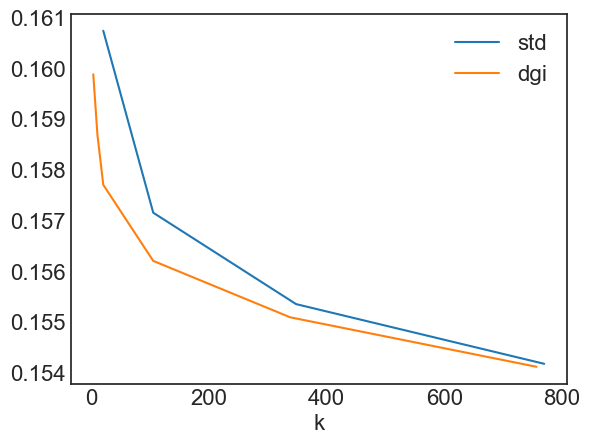

In [48]:
fig, ax = plt.subplots()
ss_info_naics.plot(x='k', y='ms_within', ax=ax, label='std')
ss_info_dgi.plot(x='k', y='ms_within', ax=ax, label='dgi')

## NAICS level

In [49]:
naics_base = train_df.drop_duplicates('NAICS').drop(columns='target') \
   .merge(train_df.groupby('NAICS')['target'].agg('mean').reset_index(),
          on='NAICS')


In [52]:
ss_info_dgi_base = pd.concat([get_ss_info(naics_base, c) for c in naics_dgi_col],
                         keys=naics_dgi_col)
ss_info_dgi_base

,,F,N,k,ss_between,ms_between,ss_within,ms_within,ss_tot
cluster_003,0,124.986768,1166,3,4.073598,2.036799,18.952384,0.016296,23.025982
cluster_010,0,35.783352,1166,10,5.017097,0.557455,18.008885,0.015579,23.025982
cluster_020,0,20.305228,1166,20,5.799329,0.305228,17.226653,0.015032,23.025982
cluster_106,0,5.832836,1166,105,8.375977,0.080538,14.650005,0.013808,23.025982
cluster_354,0,2.889023,1166,338,12.443441,0.036924,10.582541,0.012781,23.025982
cluster_834,0,3.027121,1166,757,19.534744,0.025840,3.491238,0.008536,23.025982


In [53]:
ss_info_naics_base = pd.concat([get_ss_info(naics_base, c) for c in naics_grp_col],
                         keys=naics_grp_col)
ss_info_naics_base

,,F,N,k,ss_between,ms_between,ss_within,ms_within,ss_tot
NAICS_5,0,0.996283,1166,770,15.179874,0.019740,7.846108,0.019813,23.025982
NAICS_4,0,1.971927,1166,348,10.488025,0.030225,12.537957,0.015328,23.025982
NAICS_3,0,4.525248,1166,105,7.075240,0.068031,15.950742,0.015034,23.025982
NAICS_sector,0,6.029470,1166,20,2.092606,0.110137,20.933376,0.018266,23.025982


<Axes: xlabel='k'>

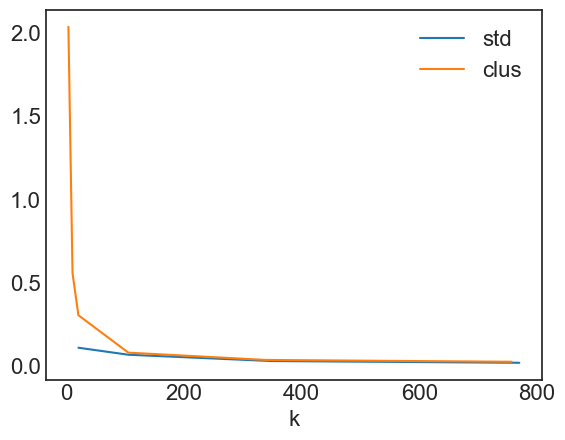

In [54]:
fig, ax = plt.subplots()
ss_info_naics_base.plot(x='k', y='ms_between', ax=ax, label='std')
ss_info_dgi_base.plot(x='k', y='ms_between', ax=ax, label='clus')

In [ ]:
TO DO  
Look at histogram of mean rates for the "NAICS 5" group
- all and joined with holdout NAICS

Write 82

Rerun 64-68. 80
   - in progress through 65
